# Health care 
## EDA

In [19]:
import pandas as pd

df = pd.read_csv("healthcare_dataset.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [20]:
#1. Shape of dataset
df.shape

(10000, 15)

In [21]:
#2. Column names
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [22]:
#3. Data types of columns
df.dtypes


Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [23]:
#4. Summary statistics (numeric)
df.describe()


,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [24]:
#5. Summary statistics (categorical)
df.describe(include=['object'])


,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,9378,2,8,6,1815,9416,8639,5,3,1834,5,3
top,Michael Johnson,Female,AB-,Asthma,2022-04-27,Michael Johnson,Smith PLC,Cigna,Urgent,2021-11-28,Penicillin,Abnormal
freq,7,5075,1275,1708,15,7,19,2040,3391,14,2079,3456


In [25]:
#6. Missing values count per column
df.isnull().sum()


Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [26]:
#7. Percentage of missing values
df.isnull().mean() * 100


Name                  0.0
Age                   0.0
Gender                0.0
Blood Type            0.0
Medical Condition     0.0
Date of Admission     0.0
Doctor                0.0
Hospital              0.0
Insurance Provider    0.0
Billing Amount        0.0
Room Number           0.0
Admission Type        0.0
Discharge Date        0.0
Medication            0.0
Test Results          0.0
dtype: float64

In [27]:
#8. Check for duplicate rows
df.duplicated().sum()


np.int64(0)

In [28]:
#9. Display duplicate rows
df[df.duplicated()]


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results


In [29]:
#10. Unique values per column
df.nunique()


Name                   9378
Age                      68
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1815
Doctor                 9416
Hospital               8639
Insurance Provider        5
Billing Amount        10000
Room Number             400
Admission Type            3
Discharge Date         1834
Medication                5
Test Results              3
dtype: int64

In [30]:
#11. Value counts of a specific categorical column (replace 'ColumnName')
df['Gender'].value_counts()


Gender
Female    5075
Male      4925
Name: count, dtype: int64

In [31]:
#12. Top 5 most frequent categories in a column
df['Name'].value_counts().head()


Name
Michael Johnson    7
James Johnson      6
Michael Martin     4
John Smith         4
Michael Miller     4
Name: count, dtype: int64

In [32]:
#13. Correlation matrix
df.corr(numeric_only=True)


,Age,Billing Amount,Room Number
Age,1.000000,-0.009483,-0.005371
Billing Amount,-0.009483,1.000000,-0.006160
Room Number,-0.005371,-0.006160,1.000000


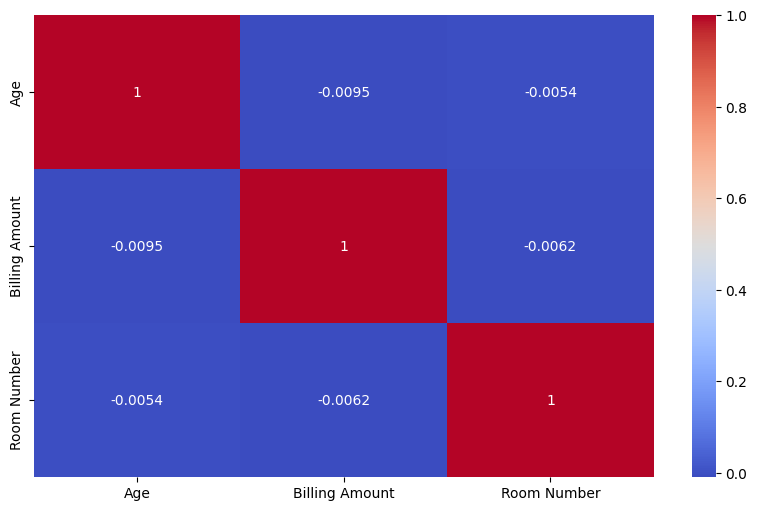

In [33]:
#14. Heatmap of correlations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()


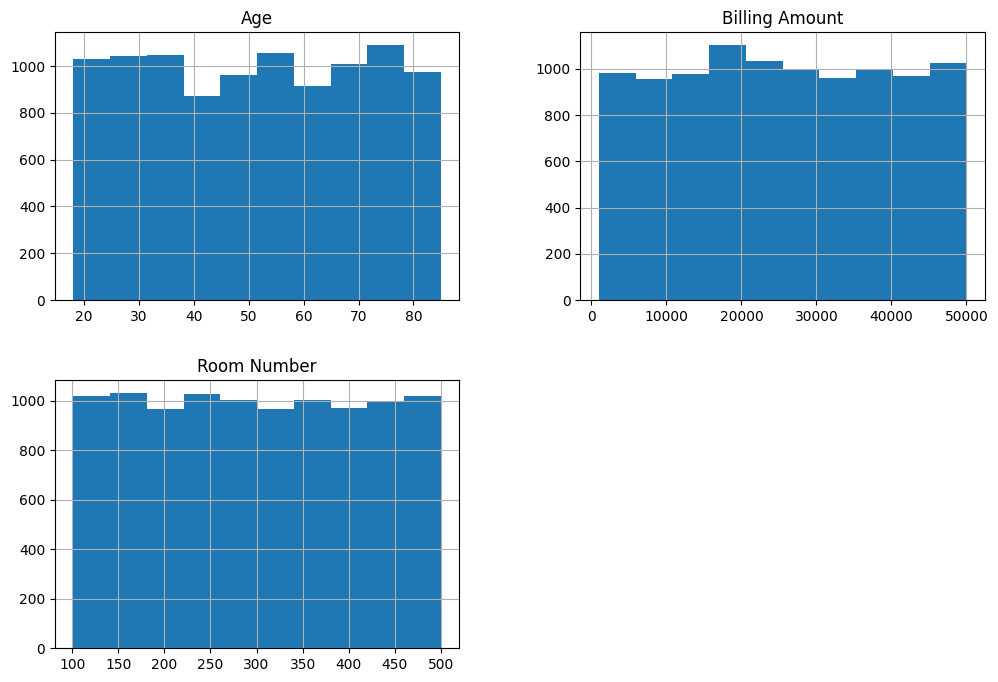

In [34]:
#15. Histogram of numeric columns
df.hist(figsize=(12,8))
plt.show()


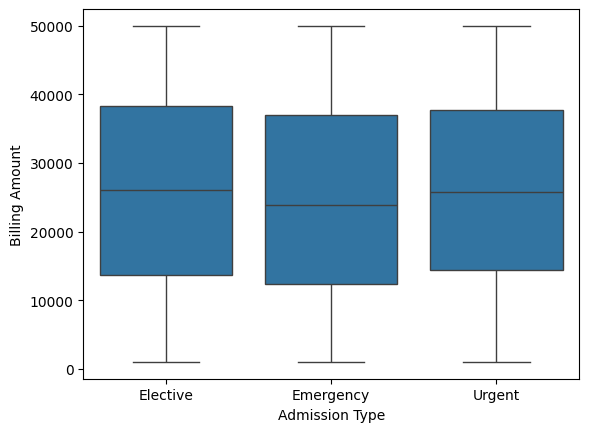

In [41]:
#16. Boxplot of Billing Amount by Admission Type
sns.boxplot(x='Admission Type', y='Billing Amount', data=df)
plt.show()



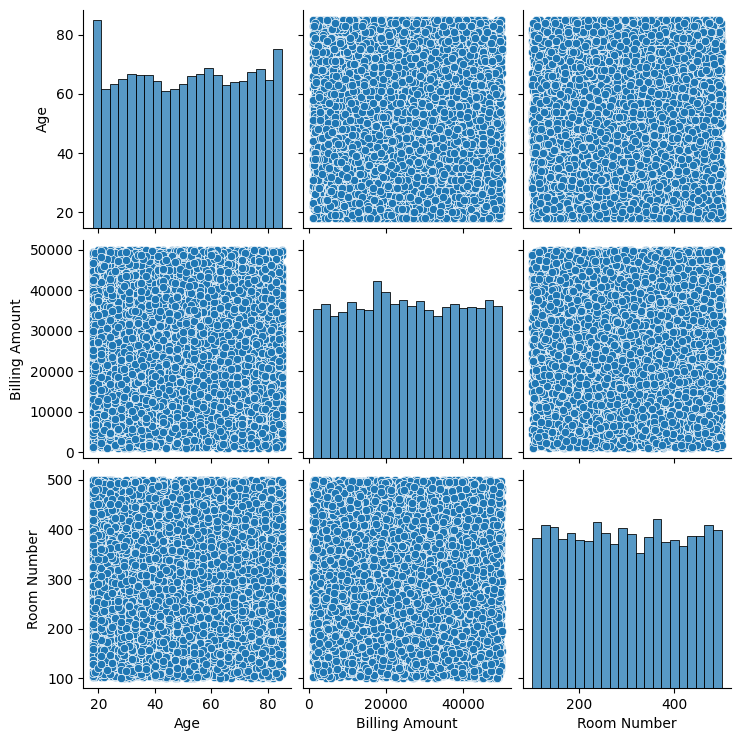

In [37]:
#17. Pairplot for numeric columns
sns.pairplot(df.select_dtypes(include=['float64','int64']))
plt.show()


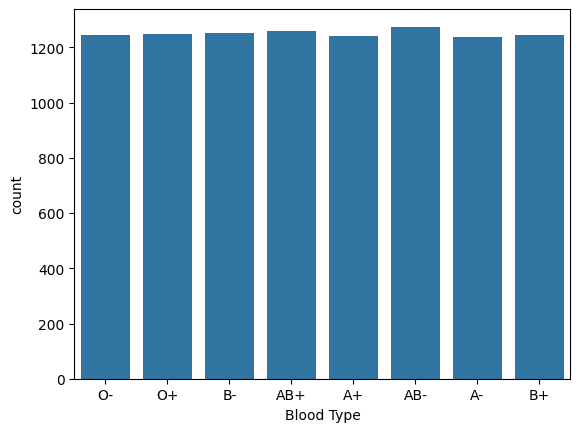

In [ ]:
#18. Countplot for blood type
sns.countplot(x='Blood Type', data=df)
plt.show()


In [40]:
#19. Check skewness of numeric columns
df.skew(numeric_only=True)


Age              -0.012148
Billing Amount    0.012721
Room Number       0.013370
dtype: float64

In [44]:
#20. Outlier detection in Billing Amount
Q1 = df['Billing Amount'].quantile(0.25)
Q3 = df['Billing Amount'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Billing Amount'] < Q1 - 1.5*IQR) | (df['Billing Amount'] > Q3 + 1.5*IQR)]
print(f"Number of outliers: {len(outliers)}")
outliers



Number of outliers: 0


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results


In [45]:
#21. Create a copy of the dataset for FE
df_fe = df.copy()


In [47]:
#22. Fill missing numeric values in Age with mean
df_fe['Age'] = df_fe['Age'].fillna(df_fe['Age'].mean())
df_fe['Age'] 


0       81
1       35
2       61
3       49
4       51
        ..
9995    83
9996    47
9997    54
9998    84
9999    20
Name: Age, Length: 10000, dtype: int64

In [48]:
#23. Fill missing categorical values in Gender with mode
df_fe['Gender'] = df_fe['Gender'].fillna(df_fe['Gender'].mode()[0])
df_fe['Gender']


0       Female
1         Male
2         Male
3         Male
4         Male
         ...  
9995      Male
9996    Female
9997      Male
9998      Male
9999      Male
Name: Gender, Length: 10000, dtype: object

In [49]:
#24. Drop rows with any missing values
df_fe_dropna = df_fe.dropna()
df_fe_dropna.shape


(10000, 15)

In [51]:
#25. Drop columns with more than 40% missing values
threshold = 0.4
df_fe = df_fe[df_fe.columns[df_fe.isnull().mean() < threshold]]
df_fe

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


In [52]:
#26. Create TotalCharges as sum of Billing Amount and Room Number
df_fe['TotalCharges'] = df_fe['Billing Amount'] + df_fe['Room Number']
df_fe['TotalCharges']


0       37636.983364
1       47708.064845
2       37166.896997
3       23783.322092
4       18563.344184
            ...     
9995    39716.840083
9996     6239.717488
9997    49871.202905
9998    25656.344761
9999    37513.965865
Name: TotalCharges, Length: 10000, dtype: float64

In [53]:
#27. Create BillPerRoom as ratio of Billing Amount to Room Number
df_fe['BillPerRoom'] = df_fe['Billing Amount'] / (df_fe['Room Number'] + 1)
df_fe['BillPerRoom']


0       255.040703
1       116.800160
2       125.852891
3        48.447655
4        37.837540
           ...    
9995    356.818379
9996     24.472316
9997    158.336112
9998     59.943812
9999    127.917408
Name: BillPerRoom, Length: 10000, dtype: float64

In [54]:
#28. Extract AdmissionYear from Date of Admission
df_fe['AdmissionYear'] = pd.to_datetime(df_fe['Date of Admission']).dt.year
df_fe['AdmissionYear'] 

0       2022
1       2023
2       2019
3       2020
4       2021
        ... 
9995    2022
9996    2022
9997    2022
9998    2020
9999    2023
Name: AdmissionYear, Length: 10000, dtype: int32

In [56]:
#29. Extract AdmissionMonth from Date of Admission
df_fe['AdmissionMonth'] = pd.to_datetime(df_fe['Date of Admission']).dt.month
df_fe['AdmissionMonth'] 

0       11
1        6
2        1
3        5
4        7
        ..
9995     7
9996     1
9997     7
9998     2
9999     3
Name: AdmissionMonth, Length: 10000, dtype: int32

In [65]:
#30. One-hot encode Gender
df_fe = pd.get_dummies(df_fe, columns=['Name'])
df_fe.head()



,Age,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,...,Name_Zachary Roberts,Name_Zachary Smith,Name_Zachary Thompson,Name_Zachary Turner,Name_Zachary Williams,Name_Zachary Wood,Name_Zachary Yates,Name_Zoe Adkins DVM,Name_Zoe Henderson,Name_Zoe Moore
0,81,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,...,False,False,False,False,False,False,False,False,False,False
1,35,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,...,False,False,False,False,False,False,False,False,False,False
2,61,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,...,False,False,False,False,False,False,False,False,False,False
3,49,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,...,False,False,False,False,False,False,False,False,False,False
4,51,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,...,False,False,False,False,False,False,False,False,False,False


In [68]:
#31. Label encode Medical Condition
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_fe['Medical Condition'] = le.fit_transform(df_fe['Medical Condition'])
df_fe['Medical Condition']


0       3
1       1
2       5
3       1
4       0
       ..
9995    5
9996    0
9997    0
9998    0
9999    0
Name: Medical Condition, Length: 10000, dtype: int64

In [70]:
#32.Normalize Billing Amount (0–1)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_fe['BillingNorm'] = scaler.fit_transform(df_fe[['Billing Amount']])



In [72]:
#33. Standardize Age
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_fe['BillingNorm'] = scaler.fit_transform(df_fe[['Billing Amount']])
df_fe['BillingNorm']

0       0.744775
1       0.945060
2       0.732201
3       0.455206
4       0.348728
          ...   
9995    0.787960
9996    0.101959
9997    0.991087
9998    0.494659
9999    0.739325
Name: BillingNorm, Length: 10000, dtype: float64

In [73]:
#34. Bin Age into equal-sized bins
df_fe['AgeBin'] = pd.cut(df_fe['Age'], bins=5, labels=False)
df_fe['AgeBin']


0       4
1       1
2       3
3       2
4       2
       ..
9995    4
9996    2
9997    2
9998    4
9999    0
Name: AgeBin, Length: 10000, dtype: int64

In [74]:
#35. Bin Billing Amount into quantile-based bins
df_fe['BillingQBin'] = pd.qcut(df_fe['Billing Amount'], q=4, labels=False)
df_fe['BillingQBin']

0       2
1       3
2       2
3       1
4       1
       ..
9995    3
9996    0
9997    3
9998    1
9999    2
Name: BillingQBin, Length: 10000, dtype: int64

In [76]:
#36. Map Admission Type to numbers
mapping = {'Emergency': 1, 'Urgent': 2, 'Elective': 3}
df_fe['AdmissionTypeMap'] = df_fe['Admission Type'].map(mapping)
df_fe['AdmissionTypeMap'] 

0       3
1       1
2       1
3       2
4       2
       ..
9995    3
9996    1
9997    3
9998    2
9999    1
Name: AdmissionTypeMap, Length: 10000, dtype: int64

In [77]:
#37. Create interaction term between Age and Billing Amount
df_fe['AgeBillingInteraction'] = df_fe['Age'] * df_fe['Billing Amount']
df_fe['AgeBillingInteraction']


0       3.036770e+06
1       1.655642e+06
2       2.249369e+06
3       1.141863e+06
4       9.224036e+05
            ...     
9995    3.287368e+06
9996    2.817987e+05
9997    2.676197e+06
9998    2.119853e+06
9999    7.444793e+05
Name: AgeBillingInteraction, Length: 10000, dtype: float64

In [79]:
#38. Apply log transformation to Billing Amount
import numpy as np
df_fe['BillingLog'] = np.log1p(df_fe['Billing Amount'])
df_fe['BillingLog']


0       10.531882
1       10.764373
2       10.515313
3       10.056394
4        9.802968
          ...    
9995    10.586782
9996     8.698968
9997    10.810943
9998    10.136080
9999    10.524735
Name: BillingLog, Length: 10000, dtype: float64

In [80]:
#39. Apply square root transformation to Billing Amount
df_fe['BillingSqrt'] = np.sqrt(df_fe['Billing Amount'])
df_fe['BillingSqrt'] 


0       193.625885
1       217.494977
2       192.028375
3       152.654257
4       134.485479
           ...    
9995    199.014673
9996     77.432018
9997    222.618963
9998    158.859513
9999    192.935134
Name: BillingSqrt, Length: 10000, dtype: float64

In [82]:
#40. Drop Name column
df_fe = df_fe.drop(columns=['Doctor'])
df_fe


,Age,Medical Condition,Date of Admission,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,...,Name_Zoe Adkins DVM,Name_Zoe Henderson,Name_Zoe Moore,BillingNorm,AgeBin,BillingQBin,AdmissionTypeMap,AgeBillingInteraction,BillingLog,BillingSqrt
0,81,3,2022-11-17,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,...,False,False,False,0.744775,4,2,3,3.036770e+06,10.531882,193.625885
1,35,1,2023-06-01,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,...,False,False,False,0.945060,1,3,1,1.655642e+06,10.764373,217.494977
2,61,5,2019-01-09,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,...,False,False,False,0.732201,3,2,1,2.249369e+06,10.515313,192.028375
3,49,1,2020-05-02,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,...,False,False,False,0.455206,2,1,2,1.141863e+06,10.056394,152.654257
4,51,0,2021-07-09,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,...,False,False,False,0.348728,2,1,2,9.224036e+05,9.802968,134.485479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,83,5,2022-07-29,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,...,False,False,False,0.787960,4,3,3,3.287368e+06,10.586782,199.014673
9996,47,0,2022-01-06,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,...,False,False,False,0.101959,2,0,1,2.817987e+05,8.698968,77.432018
9997,54,0,2022-07-01,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,...,False,False,False,0.991087,2,3,3,2.676197e+06,10.810943,222.618963
9998,84,0,2020-02-06,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,...,False,False,False,0.494659,4,1,2,2.119853e+06,10.136080,158.859513
